# Cerner Analysis Project

### Video Presentation Link

## Purpose of Project

## Business Questions

# 1) Twitter Analysis

## Import Data and Packages

In [84]:
# import popular packages
import csv
import pandas as pd
import re
import json

In [85]:
# import packages

# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# open file
with open('twitterdata.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    #print((json.dumps(tweet, indent=4))) 
    
# the original data from Twitter looks like below.

In [87]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('twitterdata.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(data))

2291


In [88]:
# read the first tweet and other meta data only
for i in data[:1]:
    print(i)

{'created_at': 'Thu Feb 28 17:45:51 +0000 2019', 'id': 1101176667878375424, 'id_str': '1101176667878375424', 'text': 'RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 918070096345600000, 'id_str': '918070096345600000', 'name': 'سبيداكر 🤠', 'screen_name': 'Spidacr', 'location': 'In لله we trust ☝🏽🕋', 'url': None, 'description': 'القدس هي عاصمة فلسطين🇵🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 285, 'friends_count': 715, 'listed_count': 0, 'favourites_count': 6566, 'statuses_count': 21140, 'created_at': 'Wed Oct 11 11:05:42 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': 'f

In [89]:
# read first five tweets only 

for i in data[:5]:
    print(i['text'])



RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
RT @CK_Mastermind: Here we go: https://t.co/4YEJgc1kUu Wir @CernerDE sind bereit, klinische Mehrwerte für mehr Patientensicherheit mit unse…
RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
RT @Sasukinho__: La ligue des debiles est décerner au FC.Snap c’est mérité on a rien pu faire https://t.co/xfSxIkhBHo


In [90]:
# Length of text
texts = []

for i in data[:]:
    texts.append(i['text'])
    
len(texts)

2291

In [91]:
# savin the entire tweets (not other data) in a variable and print it

texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

2291

In [92]:
for T in data:
    if 'text' not in T:
        print(T)

In [93]:
# Print first tweet in data
for i in data[:1]:
    print(i)

{'created_at': 'Thu Feb 28 17:45:51 +0000 2019', 'id': 1101176667878375424, 'id_str': '1101176667878375424', 'text': 'RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 918070096345600000, 'id_str': '918070096345600000', 'name': 'سبيداكر 🤠', 'screen_name': 'Spidacr', 'location': 'In لله we trust ☝🏽🕋', 'url': None, 'description': 'القدس هي عاصمة فلسطين🇵🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 285, 'friends_count': 715, 'listed_count': 0, 'favourites_count': 6566, 'statuses_count': 21140, 'created_at': 'Wed Oct 11 11:05:42 +0000 2017', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': 'f

In [94]:
# removing any error messages from Twitter API

tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)   



2291

In [95]:
# display five screen names (twitter user names)

for i in data[:5]:
    print(i['user']['screen_name'])

Spidacr
hubertclelia4
CernerDE
i_momow
h_rcm


In [96]:
# save screen_names

screen_names = [T['user']['screen_name'] for T in tweets]
len(screen_names)

2291

In [97]:
# display screen_name, tweets

for i in tweets[:5]:
    print(i['user']['screen_name'], i['text'])

Spidacr RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
hubertclelia4 RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
CernerDE RT @CK_Mastermind: Here we go: https://t.co/4YEJgc1kUu Wir @CernerDE sind bereit, klinische Mehrwerte für mehr Patientensicherheit mit unse…
i_momow RT @idkbvtimleila: y’a tout un département qu’à repris cette story ou quoi https://t.co/64FYkD5hg2
h_rcm RT @Sasukinho__: La ligue des debiles est décerner au FC.Snap c’est mérité on a rien pu faire https://t.co/xfSxIkhBHo


# Convert to CSV

In [98]:
# More codes for extracting information from tweets

ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
lang = [T['user']['lang'] for T in tweets]
followers_count = [T['user']['followers_count'] for T in tweets]
friends_count = [T['user']['friends_count'] for T in tweets]
names = [T['user']['name'] for T in tweets]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]

# open an output csv file to write to
out = open('tweetdata.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('id,created at,text,screen name,lang,followers_count,friends_count,name,lat,lon,place name,place type\n')

# merge each individual list into a single list using the zip function
rows = list(zip(ids, times, texts, screen_names, lang, followers_count, friends_count, names, lats, lons, place_names, place_types))

# use the writer module on our csv file
csv = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    #values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()

#http://mike.teczno.com/notes/streaming-data-from-twitter.html

In [99]:
# reading the data as a dataframe

df1 = pd.read_csv("tweetdata.csv")
df1.head()

,id,created at,text,screen name,lang,followers_count,friends_count,name,lat,lon,place name,place type
0,1101176667878375424,Thu Feb 28 17:45:51 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,Spidacr,fr,285,715,سبيداكر 🤠,NaN,NaN,NaN,NaN
1,1101176689760129025,Thu Feb 28 17:45:56 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,chandler,NaN,NaN,NaN,NaN
2,1101176709246844928,Thu Feb 28 17:46:01 +0000 2019,RT @CK_Mastermind: Here we go: https://t.co/4Y...,CernerDE,de,1072,1874,Cerner DACH,NaN,NaN,NaN,NaN
3,1101176719128649728,Thu Feb 28 17:46:03 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,i_momow,fr,456,526,#Vie,NaN,NaN,NaN,NaN
4,1101176738548195329,Thu Feb 28 17:46:08 +0000 2019,RT @Sasukinho__: La ligue des debiles est déce...,h_rcm,en,56,46,H,NaN,NaN,NaN,NaN


In [100]:
# Length of data frame
len(df1)

2291

## Descriptive Analysis

### Understanding Users

In [101]:
# Import
from collections import Counter

c = Counter(screen_names)

In [102]:
# how many unique users in the data?
len(c)

2215

In [103]:
#how many tweets per user?

float(2291/2215)

1.03431151241535

In [104]:
# Most popular Languages
lang = [T['user']['lang'] for T in tweets if 'user' in T]

c = Counter(lang)
print(c)

Counter({'fr': 1816, 'en': 463, 'de': 3, 'en-gb': 3, 'en-GB': 2, 'es': 2, 'ro': 1, 'it': 1})


In [105]:
# extract all English tweets & meta data and save

english = []
for i in tweets:
    if i['user']['lang'] == "en":
        english.append(i)
len(english)

463

In [106]:
# Create English data frame
df2 = df1.loc[df1['lang'] == 'en']
len(df2)

463

### Text Processing

In [107]:
# Import data frame
df2.head()

,id,created at,text,screen name,lang,followers_count,friends_count,name,lat,lon,place name,place type
1,1101176689760129025,Thu Feb 28 17:45:56 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,chandler,NaN,NaN,NaN,NaN
4,1101176738548195329,Thu Feb 28 17:46:08 +0000 2019,RT @Sasukinho__: La ligue des debiles est déce...,h_rcm,en,56,46,H,NaN,NaN,NaN,NaN
10,1101176849361764352,Thu Feb 28 17:46:34 +0000 2019,RT @By_Nyms: J’arrive pas à croire qu’un jour ...,alx_mrd,en,93,95,alx_mrd,NaN,NaN,NaN,NaN
17,1101176954798120962,Thu Feb 28 17:46:59 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,distxrsion,en,57,185,ispahan🍓,NaN,NaN,NaN,NaN
24,1101177085660409856,Thu Feb 28 17:47:30 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,babzimo,en,356,691,Imooww 🐍,NaN,NaN,NaN,NaN


In [108]:
#rename columns
df2 = df2.rename(columns={'created at': 'created_at', 'screen name': 'screen_name'})
df2.head(2)

,id,created_at,text,screen_name,lang,followers_count,friends_count,name,lat,lon,place name,place type
1,1101176689760129025,Thu Feb 28 17:45:56 +0000 2019,RT @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,chandler,NaN,NaN,NaN,NaN
4,1101176738548195329,Thu Feb 28 17:46:08 +0000 2019,RT @Sasukinho__: La ligue des debiles est déce...,h_rcm,en,56,46,H,NaN,NaN,NaN,NaN


In [109]:
#drop unnecessary columns
df2.drop('id', axis=1, inplace=True)
df2.drop('name', axis=1, inplace=True)
df2.drop('lat', axis=1, inplace=True)
df2.drop('lon', axis=1, inplace=True)
df2.drop('place name', axis=1, inplace=True)
df2.drop('place type', axis=1, inplace=True)

In [110]:
#how many columns have null values
df2.isnull().sum()

created_at         0
text               0
screen_name        0
lang               0
followers_count    0
friends_count      0
dtype: int64

In [111]:
#convert text to lowercase
df2['text'] = df2.text.str.lower()
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46


In [112]:
#find retweets
df2['retweet'] = df2.text.str.startswith("rt")
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True


In [113]:
#count the number of retweets
df2['retweet'].value_counts()

True     426
False     37
Name: retweet, dtype: int64

In [114]:
#create and clean hashtags column
df2['hashtags'] = df2.text.str.findall(r"(?<=#)\w+")
df2['hashtags'] = df2['hashtags'].apply(', '.join)
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,


In [115]:
#create and clean mentions column
df2['mentions'] = df2.text.str.findall("(?<=@)\w+")
df2['mentions'] = df2['mentions'].apply(', '.join)
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__


In [116]:
#create mention count column
df2['mention_count'] = df2.text.str.findall("(?<=@)\w+").str.len()
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1


In [117]:
#clean tweets column and make new column
df2['cleaned'] = df2['text']
df2['cleaned']=df2['text'].str.replace(r'(@\w+)', ' ')
df2['cleaned'] = df2.cleaned.str.replace('http\S+|www.\S+', '')
df2['cleaned'] = df2['cleaned'].str.replace("[^a-zA-Z]", " ")
df2['cleaned'] = df2.cleaned.str.findall('\w{4,}').str.join(' ')
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire


In [118]:
#change screename to lowercase
df2['screen_name'] = df2['screen_name'].str.lower()

In [119]:
#create column that shows whether a tweet mentions cerner
df2['ab_men']=df2.mentions.str.contains("cerner")
df2['ab_men'].value_counts()

False    444
True      19
Name: ab_men, dtype: int64

In [120]:
#create column that shows whether a is from cerner
df2['ab_tweet']=df2.screen_name.str.contains("cerner")
df2['ab_tweet'].value_counts()

False    457
True       6
Name: ab_tweet, dtype: int64

In [121]:
#find all tweets by cerner
df2.loc[df2['ab_tweet'] == True]

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned,ab_men,ab_tweet
391,Thu Feb 28 18:20:52 +0000 2019,that’s a wrap! thanks to the more than 700 ind...,cerner,en,41240,1979,False,ecf19,,0,that wrap thanks more than individuals attende...,False,True
494,Thu Feb 28 18:28:53 +0000 2019,rt @cerner: that’s a wrap! thanks to the more ...,cernerfr,en,257,223,True,ecf19,cerner,1,that wrap thanks more than individuals attende...,True,True
588,Thu Feb 28 18:35:58 +0000 2019,rt @cerner: that’s a wrap! thanks to the more ...,cernercareers,en,2738,565,True,ecf19,cerner,1,that wrap thanks more than individuals attende...,True,True
597,Thu Feb 28 18:36:30 +0000 2019,rt @cerner: we have all heard of the long-term...,cernercareers,en,2738,565,True,,cerner,1,have heard long term impacts concussions menta...,True,True
1704,Thu Feb 28 19:55:09 +0000 2019,@blackmayn @katietrott78 @royalfreenhs @cerner...,cerneruk,en,2872,991,False,,"blackmayn, katietrott78, royalfreenhs, cerner",4,ahhhhh would have bought cake,True,True
1850,Thu Feb 28 20:04:01 +0000 2019,"rt @cerneruk: ""cerner have made a huge commitm...",cernerux,en,416,120,True,,cerneruk,1,cerner have made huge commitment user centred ...,True,True


In [122]:
#create column that shows whether a tweet has a hashtag with cerner
df2['ab_hash']=df2.hashtags.str.contains('cerner|cerner', regex=True)
df2['ab_hash'].value_counts()

False    462
True       1
Name: ab_hash, dtype: int64

In [123]:
#drop unnecessary columns
df2.drop(['ab_men', 'ab_tweet','ab_hash'], axis=1, inplace=True)

In [124]:
# Reload data frame
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire


## Descriptive Text Analytics

### Original Data Set

In [125]:
# How many original tweets
originaltweets = []
for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
len(originaltweets)

99

In [126]:
# How many retweets
retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
len(retweets_only) 

2192

In [127]:
#Who are the most visible users
visible_users = []

for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i][0])

In [128]:
#List of most visible users by username
for i in visible_users[:20]:
    print(i)

@idkbvtimleila
@idkbvtimleila
@CK_Mastermind
@CernerDE
@idkbvtimleila
@Sasukinho__
@idkbvtimleila
@idkbvtimleila
@idkbvtimleila
@idkbvtimleila
@idkbvtimleila
@By_Nyms
@idkbvtimleila
@By_Nyms
@idkbvtimleila
@Sasukinho__
@idkbvtimleila
@idkbvtimleila
@idkbvtimleila
@Sasukinho__


In [129]:
# Who has the most followers and friends
followers_friends = list(zip(screen_names, followers_count, friends_count))
for i in followers_friends[:20]:
    print(i)

('Spidacr', 285, 715)
('hubertclelia4', 152, 366)
('CernerDE', 1072, 1874)
('i_momow', 456, 526)
('h_rcm', 56, 46)
('ChloeTiriau', 229, 65)
('Guelteee', 70, 1048)
('AlyssaZamord', 1159, 93)
('okokdacc', 290, 71)
('lilybordier', 107, 150)
('alx_mrd', 93, 95)
('laurine_provost', 227, 218)
('LauraLutala', 201, 72)
('tetedecul59', 41, 198)
('Riyadouu', 94, 140)
('Okayxaxm', 1132, 3145)
('kikigralover', 465, 1088)
('distxrsion', 57, 185)
('nathagones', 260, 408)
('zed_fcb', 856, 357)


In [130]:
# Most popular users by followers
user_followerscount = []

for tweet in tweets:
    user_followerscount.append([tweet['user']['screen_name'], tweet['user']['followers_count']]) 
    
user_followerscount[:20]

[['Spidacr', 285],
 ['hubertclelia4', 152],
 ['CernerDE', 1072],
 ['i_momow', 456],
 ['h_rcm', 56],
 ['ChloeTiriau', 229],
 ['Guelteee', 70],
 ['AlyssaZamord', 1159],
 ['okokdacc', 290],
 ['lilybordier', 107],
 ['alx_mrd', 93],
 ['laurine_provost', 227],
 ['LauraLutala', 201],
 ['tetedecul59', 41],
 ['Riyadouu', 94],
 ['Okayxaxm', 1132],
 ['kikigralover', 465],
 ['distxrsion', 57],
 ['nathagones', 260],
 ['zed_fcb', 856]]

In [131]:
# Order of most followed users
from operator import itemgetter

sorted(user_followerscount,key=itemgetter(1), reverse=True)[:20]

[['Cerner', 41240],
 ['WomeninTechChat', 25953],
 ['Emiliiement', 19277],
 ['mojitommo', 13760],
 ['texanselala', 11600],
 ['KCTechCouncil', 10312],
 ['drugxlwt', 7841],
 ['AmericanBanking', 6889],
 ['esiadrr', 5275],
 ['SachaPfefer26', 5129],
 ['N0UI_12', 5025],
 ['kelly_thn', 4982],
 ['theyamina', 4651],
 ['DankMemesFrance', 4545],
 ['Hvsnva', 4368],
 ['arianasyod', 4098],
 ['Pikaaahl', 3876],
 ['Laravlr_', 3661],
 ['Akram_Buu', 3543],
 ['chriispls', 3487]]

In [132]:
# Import
%matplotlib inline
import matplotlib.pyplot as plt

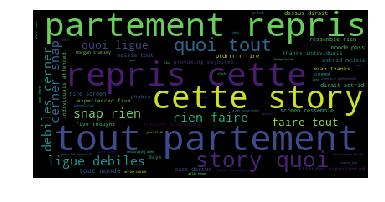

In [133]:
# Wordcloud of most popular words
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud().generate(' '.join(df2['cleaned']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [134]:
# Data Frame of most popular words
from collections import Counter

fdist = list(Counter(" ".join(df2['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
0,tout,320
5,quoi,307
2,repris,306
3,cette,306
4,story,306
1,partement,306
8,cerner,92
9,snap,89
10,rien,88
11,faire,76


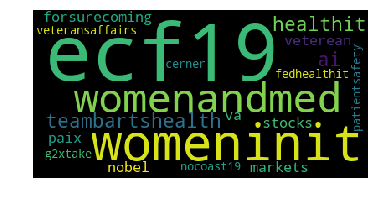

In [135]:
# Common words in hashtags
wordcloud = WordCloud().generate(' '.join(df2['hashtags']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [136]:
# most popular words by hashtag
from collections import Counter

fdist = list(Counter(" ".join(df2['hashtags']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
0,,440
3,ecf19,11
2,"womenandmed,",3
1,"womeninit,",3
15,healthit,2
9,teambartshealth,2
13,"cerner,",1
19,"fedhealthit,",1
18,nocoast19,1
17,ai,1


## Sentiment Analysis

### Vader Sentiment

In [137]:
# Import
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [138]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [139]:
# Vader
vs = SentimentIntensityAnalyzer()

In [140]:
#create a sentiment score column
df2['sent_score']=df2['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
df2.head(2)

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned,sent_score
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire,0.000


In [141]:
# summary of sentiment
df2['sent_score'].describe()

count    463.000000
mean      -0.067799
std        0.159806
min       -0.709600
25%       -0.128000
50%       -0.128000
75%        0.000000
max        0.957800
Name: sent_score, dtype: float64

In [142]:
# positive sentiment data frame
df2['pos']= df2['sent_score'] > .2
df2.head()

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned,sent_score,pos
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire,0.000,False
10,Thu Feb 28 17:46:34 +0000 2019,rt @by_nyms: j’arrive pas à croire qu’un jour ...,alx_mrd,en,93,95,True,,by_nyms,1,arrive croire jour allah homme autre aimer com...,0.000,False
17,Thu Feb 28 17:46:59 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,distxrsion,en,57,185,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False
24,Thu Feb 28 17:47:30 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,babzimo,en,356,691,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False


In [143]:
# negative sentiment data frame
df2['neg']= df2['sent_score'] < 0
df2.head()

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned,sent_score,pos,neg
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire,0.000,False,False
10,Thu Feb 28 17:46:34 +0000 2019,rt @by_nyms: j’arrive pas à croire qu’un jour ...,alx_mrd,en,93,95,True,,by_nyms,1,arrive croire jour allah homme autre aimer com...,0.000,False,False
17,Thu Feb 28 17:46:59 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,distxrsion,en,57,185,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True
24,Thu Feb 28 17:47:30 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,babzimo,en,356,691,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True


In [144]:
# nuetral sentiment data frame
df2['neu']= ((df2['sent_score'] >= 0) & (df2['sent_score']< .2))
df2.head()

,created_at,text,screen_name,lang,followers_count,friends_count,retweet,hashtags,mentions,mention_count,cleaned,sent_score,pos,neg,neu
1,Thu Feb 28 17:45:56 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,hubertclelia4,en,152,366,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True,False
4,Thu Feb 28 17:46:08 +0000 2019,rt @sasukinho__: la ligue des debiles est déce...,h_rcm,en,56,46,True,,sasukinho__,1,ligue debiles cerner snap rien faire,0.000,False,False,True
10,Thu Feb 28 17:46:34 +0000 2019,rt @by_nyms: j’arrive pas à croire qu’un jour ...,alx_mrd,en,93,95,True,,by_nyms,1,arrive croire jour allah homme autre aimer com...,0.000,False,False,True
17,Thu Feb 28 17:46:59 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,distxrsion,en,57,185,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True,False
24,Thu Feb 28 17:47:30 +0000 2019,rt @idkbvtimleila: y’a tout un département qu’...,babzimo,en,356,691,True,,idkbvtimleila,1,tout partement repris cette story quoi,-0.128,False,True,False


In [145]:
# positive sentiment counts
df2['pos'].value_counts()

False    440
True      23
Name: pos, dtype: int64

In [146]:
# nuetral sentiment counts
df2['neu'].value_counts()

False    350
True     113
Name: neu, dtype: int64

In [147]:
# negative sentiment counts
df2['neg'].value_counts()

True     327
False    136
Name: neg, dtype: int64

## Twitter Analysis Summary

# 2) Review Analysis

## Import Data and Packages

In [1]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Verify website
r = requests.get('https://www.softwareadvice.com/medical/cerner-powerchart-profile/')
data = html.fromstring(r.text)

data

<Element html at 0x1a331c5b048>

In [3]:
# develop xpath
for i in data.xpath("//div[@class='review-copy-container']")[:2]:
    print(i.xpath("p/text()"))

['Cerner Powerchart Review', 'Overall experience was good. I was initially trained on Cerner Powerchart. There are better EMR systems out there as far as flow, successful add-ons, and auto saving features. However, I must say that the ease of charting on systems and pages within the original body of Powerchart software flows very well. I love the short cuts that I am able to use so that my charting time is much faster than veterans using the system. The customization of pages for each department makes it very friendly for the user. And best of all that customized organization you are used to having follows you in case you float to another unit.', "The Pro's about this software include that it can be customized to make changes throughout every department within the hospital system that uses it. This makes the software versatile. I have seldom had a tired day without running through the routine of charting on patients but Cerner allows for the quick access lists of options in my charting

In [4]:
# append data
alldata =[]

for i in data.xpath("//div[@class='review-copy-container']")[:2]:
    review = (i.xpath("p/text()"))
    print(review)
    alldata.append([review])

['Cerner Powerchart Review', 'Overall experience was good. I was initially trained on Cerner Powerchart. There are better EMR systems out there as far as flow, successful add-ons, and auto saving features. However, I must say that the ease of charting on systems and pages within the original body of Powerchart software flows very well. I love the short cuts that I am able to use so that my charting time is much faster than veterans using the system. The customization of pages for each department makes it very friendly for the user. And best of all that customized organization you are used to having follows you in case you float to another unit.', "The Pro's about this software include that it can be customized to make changes throughout every department within the hospital system that uses it. This makes the software versatile. I have seldom had a tired day without running through the routine of charting on patients but Cerner allows for the quick access lists of options in my charting

## Web Collection

In [5]:
# loop 5 times
for i in range(1,5):
    print(i)

1
2
3
4


In [6]:
#generating urls
web = "https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews="

for page in range(0,4,1):
    print(web + str(page))

https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews=0
https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews=1
https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews=2
https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews=3


In [11]:
# crawl data
finaldata = []

web = "https://www.softwareadvice.com/medical/cerner-powerchart-profile/?reviews="

# crawl multiple pages (3 or 4 pages)

alldata =[]

for page in range(1,4):
    url = (web + str(page))
    data = html.fromstring(requests.get(url).text)

for i in data.xpath("//div[@class='review-copy-container']"):
    review = (i.xpath("p/text()"))
    #print(review)
    alldata.append([review])

In [12]:
# to data frame

df = pd.DataFrame(alldata)
df.head()

,0
0,"[Cerner Powerchart Review, Overall experience ..."
1,"[Cerner PowerChart Review, Overal Cerner Power..."
2,"[365 Medical EMR , Must customizable EMR solut..."
3,[harder to get used to after using EPIC for EH...
4,"[Rich function, poor user friendly interface, ..."


In [13]:
# length of data
len(df)

20

## Clean Data

In [14]:
# develop strings
df[0]=df[0].str[0]
df.head(2)

,0
0,Cerner Powerchart Review
1,Cerner PowerChart Review


In [15]:
# rename columns
df = df.rename(columns={0: 'review'})
df.head(1)

,review
0,Cerner Powerchart Review


In [16]:
# save data
df = pd.DataFrame(alldata)       
df.to_csv("cerner_review.csv", index=False, encoding="utf-8")

## Text Analysis

### Tokens

In [17]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 399.5, 199.5, -0.5)

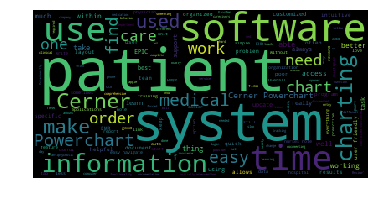

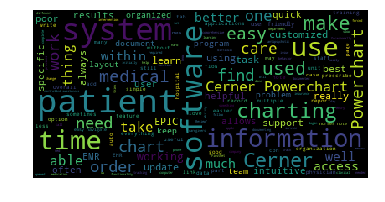

In [18]:
# create wordcloud of most popular words
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Read the whole text.
text = open('cerner_review.csv', encoding="utf8").read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

In [19]:
# open data
review = []
openfile = open('cerner_review.csv', 'r')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [20]:
# clean and tokenize
def text_processing(review):
    # what if you have additional stopwords to be removed
    tokens = str(review)
    #lowecases
    tokens = tokens.lower()
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
    #additional stopwrods
    more_stopwords = set(('cant', 'aint', 'today'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    return tokens

In [21]:
# most popular tokens
fdist = nltk.FreqDist(text_processing(review))
fdist

FreqDist({'patient': 36, 'system': 30, 'software': 29, 'cerner': 25, 'time': 22, 'information': 22, 'use': 20, 'powerchart': 19, 'charting': 16, 'easy': 15, ...})

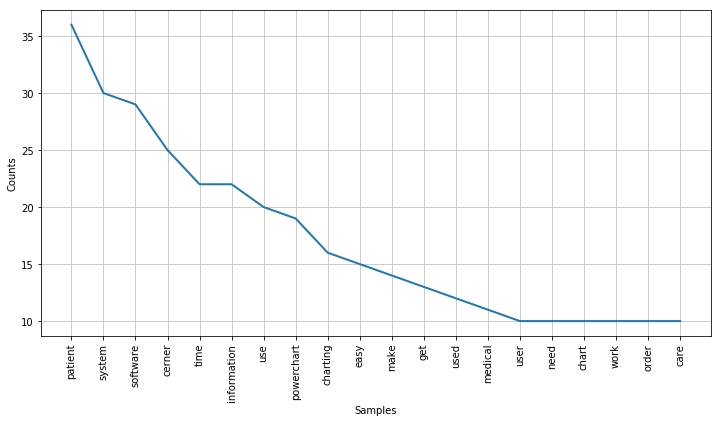

In [22]:
# graph of most popular tokens
plt.figure(figsize=(12,6))
fdist.plot(20)

### Bigrams

In [23]:
# open data
review = []
openfile = open('cerner_review.csv', 'r')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close

#print(review)

<function TextIOWrapper.close()>

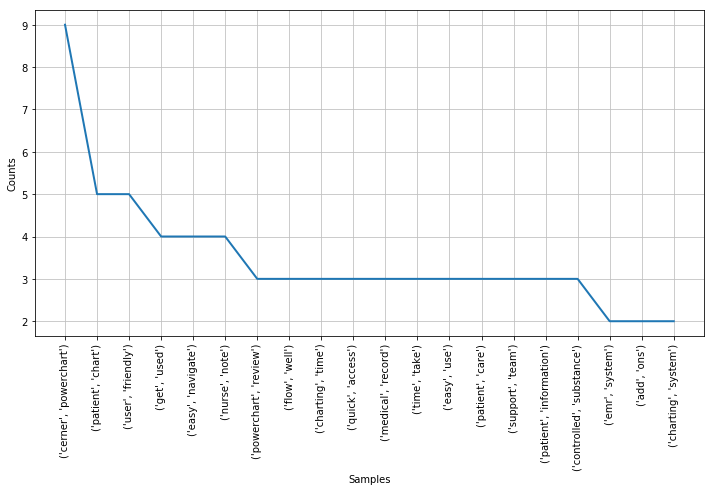

In [24]:
# further cleaning and create bigrams
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(20)

## Sentiment Analysis

### Textblob

In [25]:
# import
import csv
import re
import pandas as pd

import nltk
from nltk.corpus import stopwords

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
# open data
openfile = open("cerner_review.csv", "r")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

In [27]:
#remove the extra bracket
reviews = [x for y in reviews for x in y]

In [28]:
# print data
review[:2]

[['0'],
 ['[\'Cerner Powerchart Review\', \'Overall experience was good. I was initially trained on Cerner Powerchart. There are better EMR systems out there as far as flow, successful add-ons, and auto saving features. However, I must say that the ease of charting on systems and pages within the original body of Powerchart software flows very well. I love the short cuts that I am able to use so that my charting time is much faster than veterans using the system. The customization of pages for each department makes it very friendly for the user. And best of all that customized organization you are used to having follows you in case you float to another unit.\', "The Pro\'s about this software include that it can be customized to make changes throughout every department within the hospital system that uses it. This makes the software versatile. I have seldom had a tired day without running through the routine of charting on patients but Cerner allows for the quick access lists of option

In [29]:
# import
!pip install textblob
import csv
import re
import pandas as pd

from textblob import TextBlob

import nltk
from nltk.corpus import stopwords

In [30]:
# open data
openfile = open("cerner_review.csv", "r")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()

In [31]:
# print data
reviews = [x for y in reviews for x in y]
reviews[:2]

['0',
 '[\'Cerner Powerchart Review\', \'Overall experience was good. I was initially trained on Cerner Powerchart. There are better EMR systems out there as far as flow, successful add-ons, and auto saving features. However, I must say that the ease of charting on systems and pages within the original body of Powerchart software flows very well. I love the short cuts that I am able to use so that my charting time is much faster than veterans using the system. The customization of pages for each department makes it very friendly for the user. And best of all that customized organization you are used to having follows you in case you float to another unit.\', "The Pro\'s about this software include that it can be customized to make changes throughout every department within the hospital system that uses it. This makes the software versatile. I have seldom had a tired day without running through the routine of charting on patients but Cerner allows for the quick access lists of options i

In [33]:
# remove useless symbols and numericals
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]

In [34]:
# print data
for row in documents[:2]:
    print(TextBlob(row))

 
 Cerner Powerchart Review Overall experience was good I was initially trained on Cerner Powerchart There are better EMR systems out there as far as flow successful add ons and auto saving features However I must say that the ease of charting on systems and pages within the original body of Powerchart software flows very well I love the short cuts that I am able to use so that my charting time is much faster than veterans using the system The customization of pages for each department makes it very friendly for the user And best of all that customized organization you are used to having follows you in case you float to another unit The Pro s about this software include that it can be customized to make changes throughout every department within the hospital system that uses it This makes the software versatile I have seldom had a tired day without running through the routine of charting on patients but Cerner allows for the quick access lists of options in my charting that can be expa

In [35]:
# Textblob analysis
for row in documents:
    print(TextBlob(row).sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1649684343434343, subjectivity=0.45349747474747487)
Sentiment(polarity=0.13457792207792207, subjectivity=0.4951298701298701)
Sentiment(polarity=0.12291666666666667, subjectivity=0.35624999999999996)
Sentiment(polarity=0.17064625850340134, subjectivity=0.4589455782312927)
Sentiment(polarity=0.05128205128205127, subjectivity=0.49487179487179495)
Sentiment(polarity=0.10527210884353742, subjectivity=0.3170068027210884)
Sentiment(polarity=0.23925454545454547, subjectivity=0.4495151515151515)
Sentiment(polarity=0.15357142857142858, subjectivity=0.3711580086580087)
Sentiment(polarity=0.2044871794871795, subjectivity=0.39349816849816843)
Sentiment(polarity=0.16607744107744107, subjectivity=0.47272727272727266)
Sentiment(polarity=0.27321428571428574, subjectivity=0.5642857142857143)
Sentiment(polarity=0.4314814814814814, subjectivity=0.6422839506172839)
Sentiment(polarity=0.39895833333333336, subjectivity=0.8694444444444445)
Sentime

In [97]:
# cleaned analysis
for row in documents:
    print(TextBlob(row).sentiment.polarity, TextBlob(row).sentiment.subjectivity)

0.0 0.0
0.1649684343434343 0.45349747474747487
0.13457792207792207 0.4951298701298701
0.12291666666666667 0.35624999999999996
0.17064625850340134 0.4589455782312927
0.05128205128205127 0.49487179487179495
0.10527210884353742 0.3170068027210884
0.23925454545454547 0.4495151515151515
0.15357142857142858 0.3711580086580087
0.2044871794871795 0.39349816849816843
0.16607744107744107 0.47272727272727266
0.27321428571428574 0.5642857142857143
0.4314814814814814 0.6422839506172839
0.39895833333333336 0.8694444444444445
0.3666666666666667 0.3666666666666667
0.24444444444444446 0.4277777777777778
0.15633608815426997 0.5722746950019677
0.0349920255183413 0.41704944178628384
0.30123456790123465 0.528395061728395
0.20555555555555557 0.4055555555555556
-0.019999999999999997 0.58


In [98]:
# import
import pandas as pd

In [99]:
# create data set
avg = []

for row in documents:
    avg.append([TextBlob(row).sentiment.polarity, TextBlob(row).sentiment.subjectivity])

In [100]:
# create data frame
df=pd.DataFrame(avg)
df

,0,1
0,0.000000,0.000000
1,0.164968,0.453497
2,0.134578,0.495130
3,0.122917,0.356250
4,0.170646,0.458946
5,0.051282,0.494872
6,0.105272,0.317007
7,0.239255,0.449515
8,0.153571,0.371158
9,0.204487,0.393498


In [101]:
# summary of sentiment
df.describe()

,0,1
count,21.000000,21.000000
mean,0.185997,0.458873
std,0.122525,0.160601
min,-0.020000,0.000000
25%,0.122917,0.393498
50%,0.166077,0.453497
75%,0.244444,0.528395
max,0.431481,0.869444


In [102]:
# append sentiment
positive_review = []
negative_review = []
neutral_review = []

for row in reviews:
    #tweet = row[0]
    score = TextBlob(row).sentiment.polarity
    if score > 0:
        positive_review.append(row)
    elif score == 0:
        neutral_review.append(row)
    else:
        negative_review.append(row)

In [103]:
# count of review scores
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

19
1
1


In [104]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [105]:
# remove extra brackets)
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens[:10]

['cerner',
 'powerchart',
 'review',
 'overall',
 'experience',
 'good',
 'initially',
 'trained',
 'cerner',
 'powerchart']

In [106]:
# word frequency
from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(20)

[('software', 28),
 ('cerner', 24),
 ('system', 23),
 ('information', 22),
 ('patient', 21),
 ('use', 19),
 ('powerchart', 18),
 ('time', 18),
 ('charting', 16),
 ('patients', 15),
 ('easy', 15),
 ('used', 12),
 ('get', 12),
 ('user', 10),
 ('work', 10),
 ('medical', 10),
 ('care', 10),
 ('find', 10),
 ('one', 9),
 ('able', 8)]

In [107]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in negative_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [108]:
# remove extra brackets)
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens[:10]

['sometimes',
 'difficult',
 'navigate',
 'powerchart',
 'comprehensive',
 'electronic',
 'medical',
 'record',
 'powered',
 'cerner']

In [109]:
# word frequency
from collections import Counter

negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(20)

[('sometimes', 2),
 ('difficult', 2),
 ('navigate', 2),
 ('notes', 2),
 ('powerchart', 1),
 ('comprehensive', 1),
 ('electronic', 1),
 ('medical', 1),
 ('record', 1),
 ('powered', 1),
 ('cerner', 1),
 ('results', 1),
 ('seen', 1),
 ('immediately', 1),
 ('posted', 1),
 ('available', 1),
 ('caregivers', 1),
 ('legitimate', 1),
 ('access', 1),
 ('software', 1)]

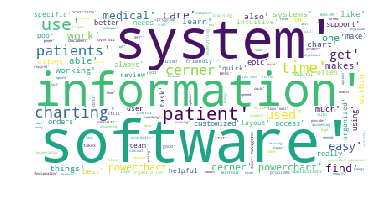

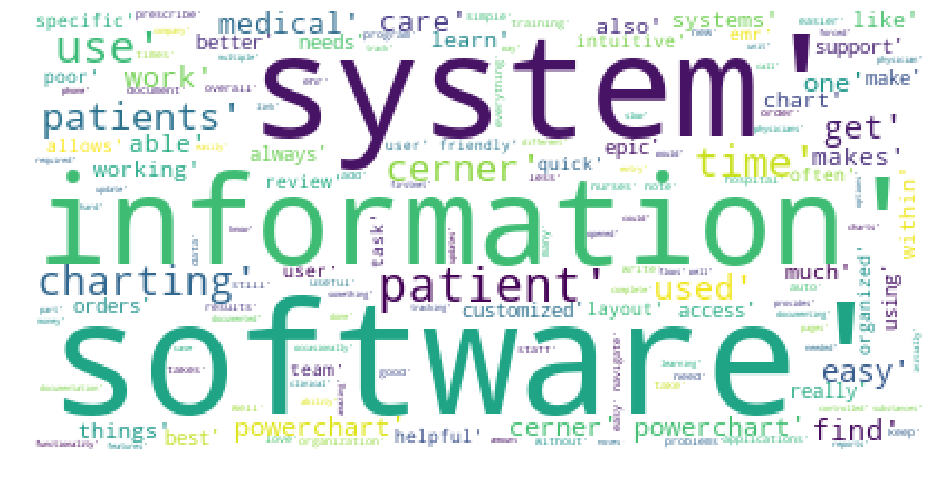

In [110]:
# wordcloud of most popular positive words

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

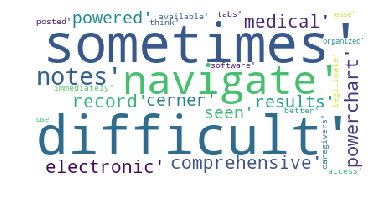

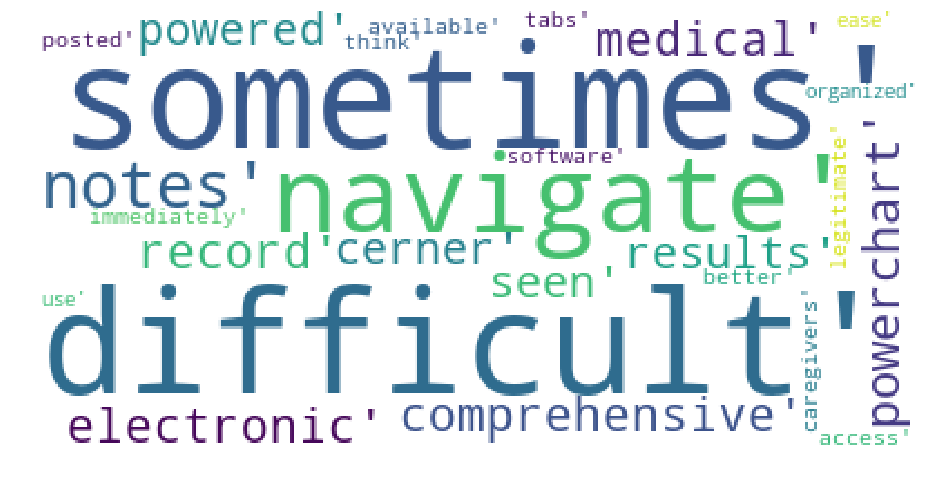

In [111]:
# wordcloud of most popular negative reviews

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_negative_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

## Review Analysis Summary

# Recommendations